In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
import matplotlib.ticker as ticker
import seaborn as sns; sns.set()
import pandas as pd

import math

import pymatgen as mg
from graspy.cluster import GaussianCluster as GC
from graspy.embed import AdjacencySpectralEmbed
from graspy.plot import heatmap, pairplot

## Element data figures

In [26]:
elements = [
    'H','He',
    'Li','Be','B','C','N','O','F','Ne',
    'Na','Mg','Al','Si','P','S','Cl','Ar',
    'K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Ga','Ge','As','Se','Br','Kr',
    'Rb','Sr','Y','Zr','Nb','Mo','Tc','Ru','Rh','Pd','Ag','Cd','In','Sn','Sb','Te','I','Xe',
    'Cs','Ba','La',
    'Ce','Pr','Nd','Pm','Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm','Yb','Lu',
    'Hf','Ta','W','Re','Os','Ir','Pt','Au','Hg',
    'Tl','Pb','Bi','Po','At','Rn',
    'Fr','Ra','Ac',
    'Th','Pa','U','Np','Pu','Am','Cm','Bk','Cf','Es','Fm',
    'Md','No','Lr']

In [27]:
def get_masses_and_melting_points(elements):
    masses = []
    melting_points = []
    for elem in elements:
        try:
            e = mg.Element(elem)
            masses.append(float(e.atomic_mass))
            if e.melting_point == 'maybe about 300 K':
                melting_points.append(300.)
            else:
                melting_points.append(float(e.melting_point))
        except:
            print('wohops:', elem)
    return masses, melting_points

In [28]:
masses, melting_points = get_masses_and_melting_points(elements)
print(melting_points)

[14.01, 0.95, 453.69, 1560.0, 2349.0, 3800.0, 63.05, 54.8, 53.53, 24.56, 370.87, 923.0, 933.47, 1687.0, 317.3, 388.36, 171.6, 83.8, 336.53, 1115.0, 1814.0, 1941.0, 2183.0, 2180.0, 1519.0, 1811.0, 1768.0, 1728.0, 1357.77, 692.68, 302.91, 1211.4, 1090.0, 494.0, 265.8, 115.79, 312.46, 1050.0, 1799.0, 2128.0, 2750.0, 2896.0, 2430.0, 2607.0, 2237.0, 1828.05, 1234.93, 594.22, 429.75, 505.08, 903.78, 722.66, 386.85, 161.4, 301.59, 1000.0, 1193.0, 1068.0, 1208.0, 1297.0, 1373.0, 1345.0, 1099.0, 1585.0, 1629.0, 1680.0, 1734.0, 1802.0, 1818.0, 1097.0, 1925.0, 2506.0, 3290.0, 3695.0, 3459.0, 3306.0, 2739.0, 2041.4, 1337.33, 234.32, 577.0, 600.61, 544.4, 527.0, 575.0, 202.0, 300.0, 973.0, 1323.0, 2115.0, 1841.0, 1405.3, 910.0, 912.5, 1449.0, 1613.0, 1259.0, 1173.0, 1133.0, 1800.0, 1100.0, 1100.0, 1900.0]


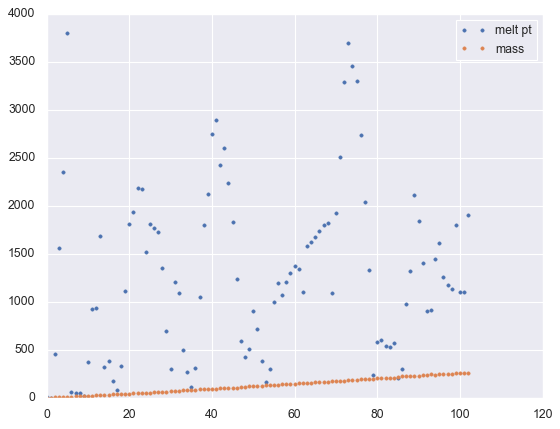

In [29]:
plt.plot(melting_points, '.', label='melt pt')
plt.plot(masses, '.', label='mass')
plt.legend(loc=0)
plt.savefig('properties.png')

In [30]:
masses = np.array(masses).reshape(-1,1)
melting_points = np.array(melting_points).reshape(-1,1)
both = np.concatenate((masses,melting_points),axis=1)
both.shape

(103, 2)

In [31]:
def distance_matrix(mat):
    m1 = mat[np.newaxis, :, :]
    m2 = mat[:, np.newaxis, :]
    r = m1 - m2
    # print (r.shape)
    r *= r 
    d2 = r.sum(axis=2)
    # print (d2.shape)
    return d2

def graph_matrix(dist, thresh):
    A = (dist<thresh)
    np.fill_diagonal(A,False)
    A = A.astype(np.float)
    return A

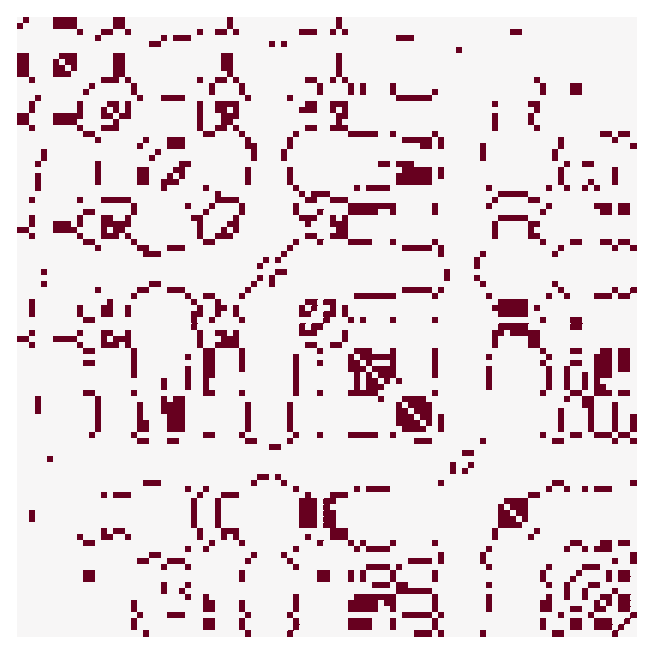

In [32]:
d2 = distance_matrix(both)
A = graph_matrix(d2, 50000)
heatmap(A,cbar=False)
plt.savefig('elem_dists.png')

/anaconda3/lib/python3.7/site-packages/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


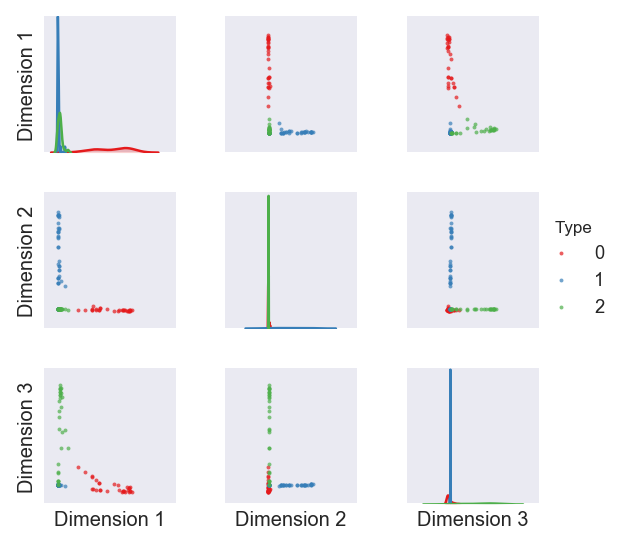

In [33]:
easy_ase = AdjacencySpectralEmbed(n_components=3)
easy_A2 = easy_ase.fit_transform(A)
# pairplot(easy_A2)
gc = GC(4)
easy_A2l = gc.fit_predict(easy_A2)
pairplot(easy_A2,easy_A2l)
plt.savefig('easy_elem_clust_4.png')

/anaconda3/lib/python3.7/site-packages/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


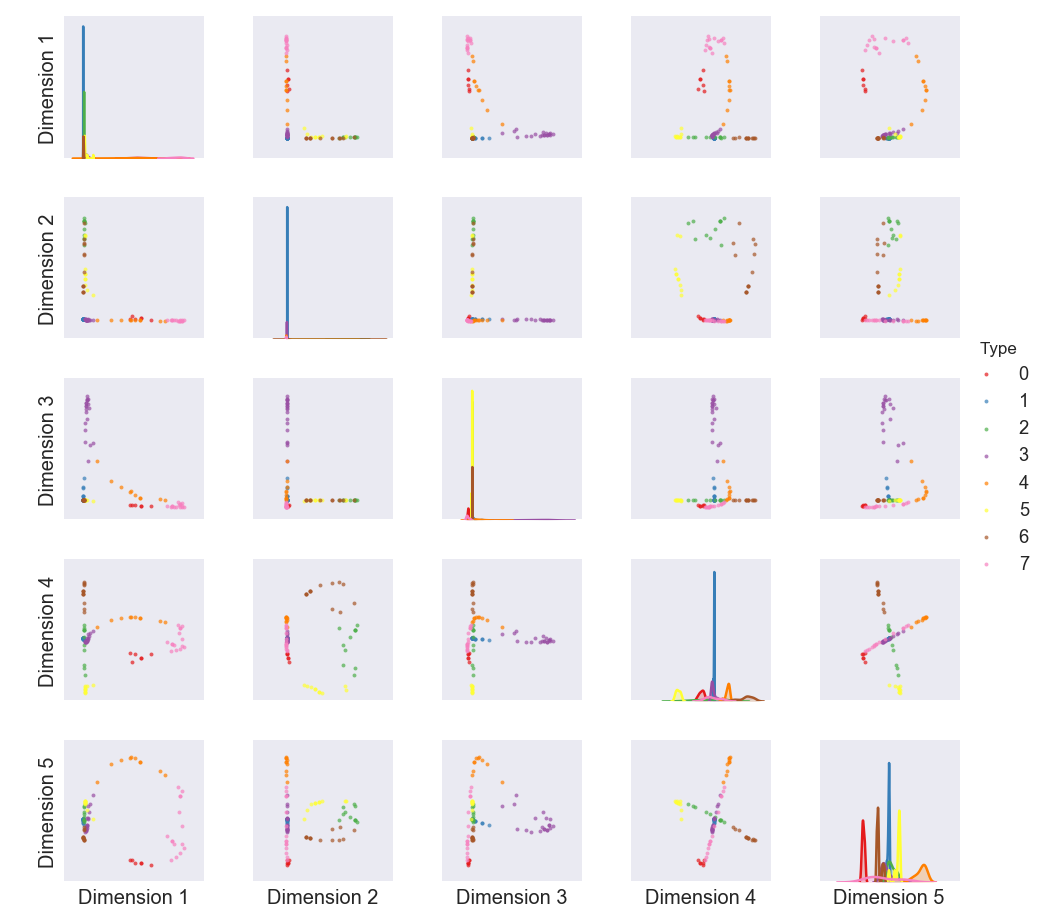

In [34]:
ase = AdjacencySpectralEmbed() #now using ZG2 instead of a specific n_components
A2 = ase.fit_transform(A)
# pairplot(A2)
gc = GC(15)
A2l = gc.fit_predict(A2)
pairplot(A2,A2l)
plt.savefig('elem_clust.png')

In [35]:
els = np.array(elements).reshape(-1,1)
for i in range(8):
    print(els[A2l==i]) #print group labels

[['Mg']
 ['Al']
 ['Sb']
 ['Ra']
 ['Np']
 ['Pu']]
[['B']
 ['C']
 ['V']
 ['Cr']
 ['Zr']
 ['Nb']
 ['Mo']
 ['Tc']
 ['Ru']
 ['Rh']
 ['Hf']
 ['Ta']
 ['W']
 ['Re']
 ['Os']
 ['Ir']
 ['Pt']
 ['Th']]
[['Li']
 ['Na']
 ['P']
 ['S']
 ['K']
 ['Ga']
 ['Rb']
 ['In']
 ['I']
 ['Cs']
 ['Fr']]
[['Be']
 ['Si']
 ['Sc']
 ['Ti']
 ['Fe']
 ['Co']
 ['Ni']
 ['Y']
 ['Pd']
 ['Gd']
 ['Tb']
 ['Dy']
 ['Ho']
 ['Er']
 ['Tm']
 ['Lu']
 ['Pa']
 ['Cm']
 ['Fm']
 ['Lr']]
[['Mn']
 ['Cu']
 ['Nd']
 ['Pm']
 ['Sm']
 ['Au']
 ['Ac']
 ['U']
 ['Am']
 ['Bk']]
[['Zn']
 ['Se']
 ['Cd']
 ['Sn']
 ['Te']
 ['Tl']
 ['Pb']
 ['Bi']
 ['Po']
 ['At']]
[['H']
 ['He']
 ['N']
 ['O']
 ['F']
 ['Ne']
 ['Cl']
 ['Ar']
 ['Br']
 ['Kr']
 ['Xe']
 ['Hg']
 ['Rn']]
[['Ca']
 ['Ge']
 ['As']
 ['Sr']
 ['Ag']
 ['Ba']
 ['La']
 ['Ce']
 ['Pr']
 ['Eu']
 ['Yb']
 ['Cf']
 ['Es']
 ['Md']
 ['No']]


## Molecular data figures

In [36]:
csv = pd.read_csv('~/Desktop/hconf.csv').dropna()
formula = csv.values[:,0]
dtable = csv.values[:,[2,7,-3]].astype('float') #EA, MW, Red_H
dtable.shape

(871, 3)

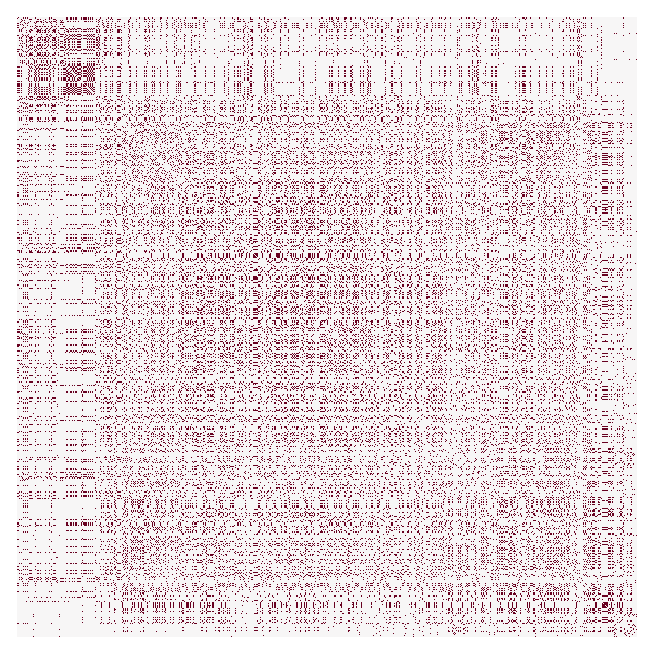

In [50]:
d2 = distance_matrix(dtable)
A2 = graph_matrix(d2, 250)
heatmap(A2,cbar=False)
plt.savefig('mol_dists.png')

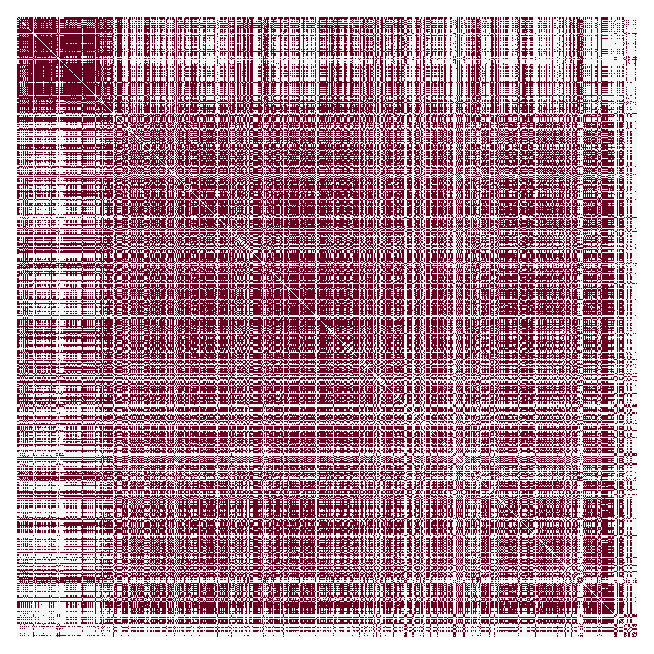

In [51]:
A3 = graph_matrix(d2, 5000)
heatmap(A3,cbar=False)
plt.savefig('mol_dists_2.png')

In [52]:
ase = AdjacencySpectralEmbed()
A22 = ase.fit_transform(A2)

/anaconda3/lib/python3.7/site-packages/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


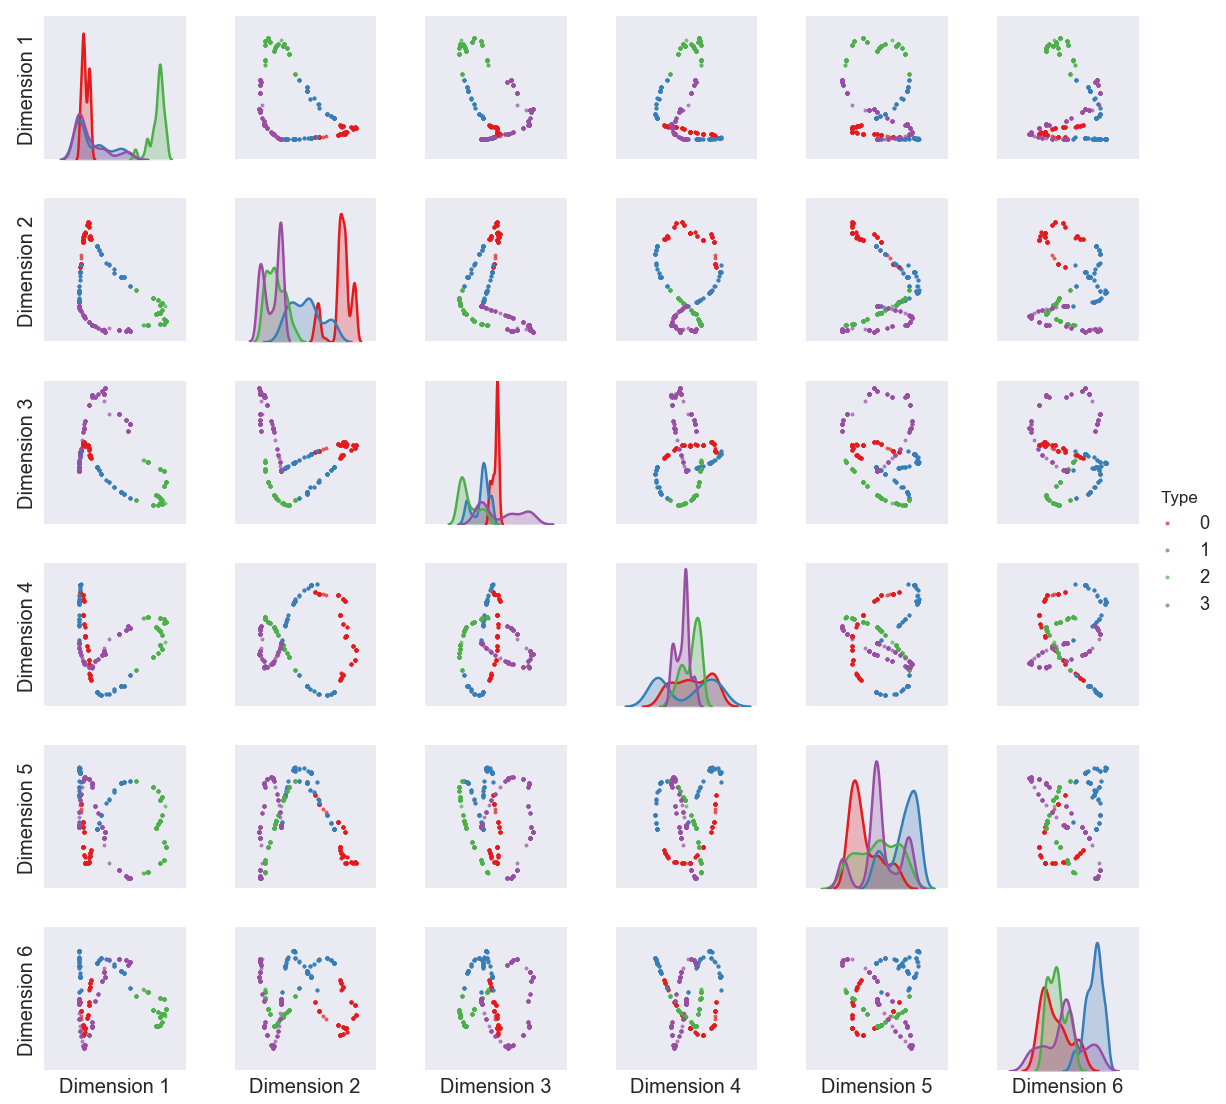

In [53]:
gc = GC(4)
easy_A2l = gc.fit_predict(A22)
pairplot(A22,easy_A2l)
plt.savefig('easy_mol_clust.png')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


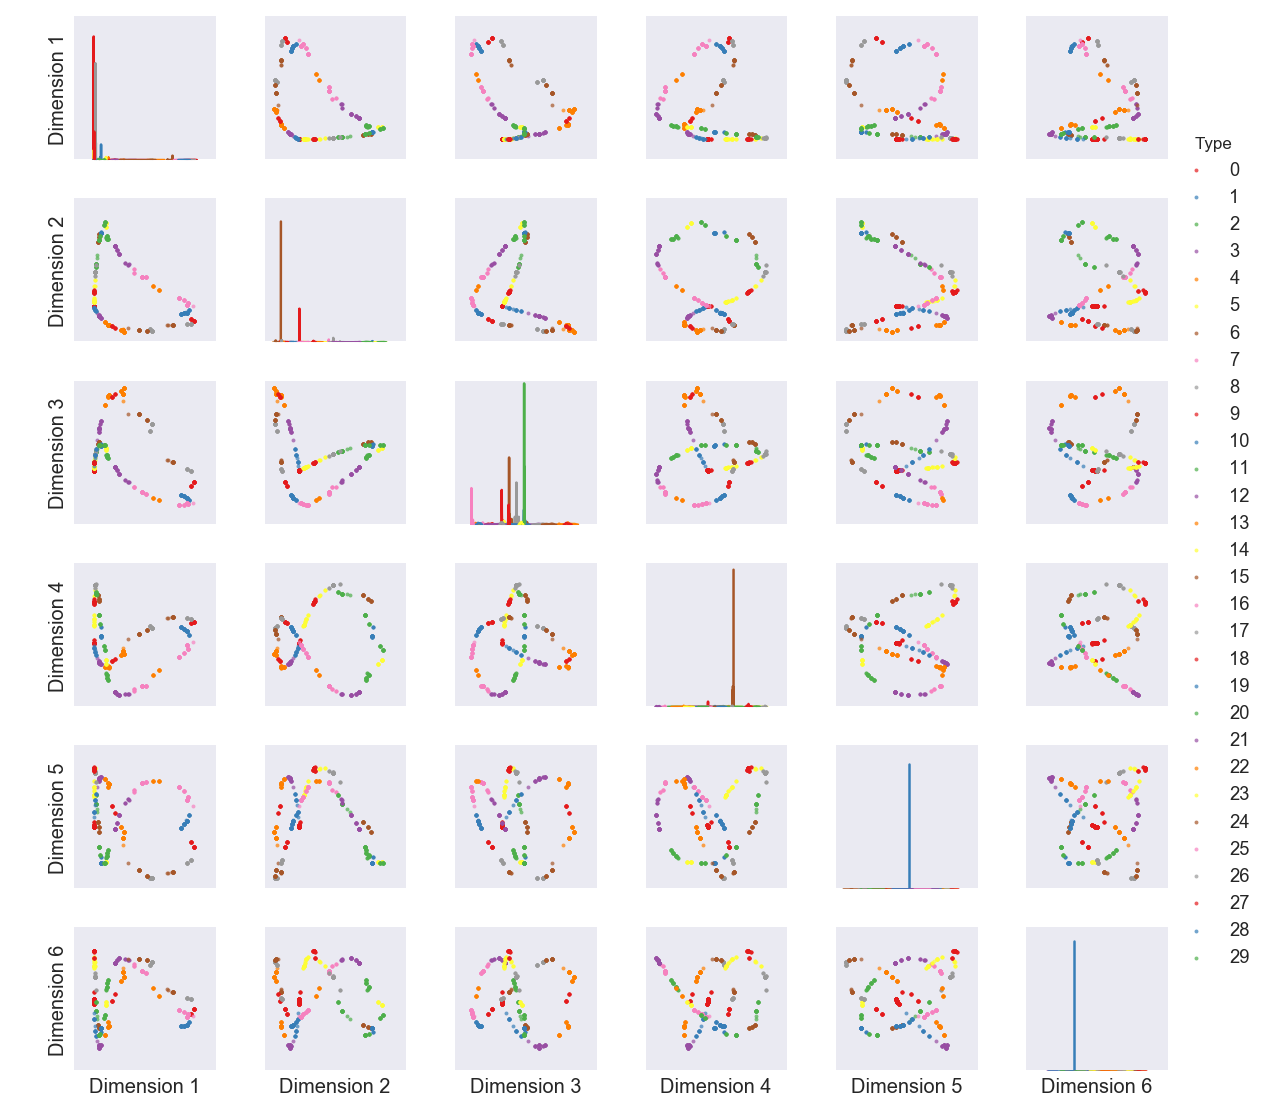

In [54]:
gc = GC(30)
A2l = gc.fit_predict(A22)
pairplot(A22,A2l)
plt.savefig('mol_clust.png')

In [55]:
formula = np.array(formula).reshape(-1,1)
for i in range(8):
    print(formula[A2l==i]) #molecule labels

[['H14 C16 N1 O2 F3']
 ['H19 C16 N2 O2 F3']
 ['H23 C17 N2 O3 F1']
 ['H19 C16 N2 O2 F3']
 ['H16 C15 N3 O1 F3']
 ['H16 C15 N3 O1 F3']
 ['H23 C17 N2 O3 F1']
 ['H27 C20 N2 O4 F3']
 ['H23 C17 N2 O3 F1']
 ['H16 C15 N3 O1 F3']
 ['H16 C15 N3 O1 F3']
 ['H16 C15 N3 O1 F3']
 ['H19 C16 N2 O2 F3']
 ['H27 C20 N2 O4 F3']
 ['H19 C16 N2 O2 F3']
 ['H16 C15 N3 O1 F3']
 ['H16 C15 N3 O1 F3']
 ['H16 C15 N3 O1 F3']
 ['H27 C19 N2 O4 F1']
 ['H23 C17 N2 O3 F1']
 ['H27 C19 N2 O4 F1']
 ['H23 C17 N2 O3 F1']
 ['H27 C20 N2 O4 F3']
 ['H23 C17 N2 O3 F1']
 ['H16 C15 N3 O1 F3']
 ['H23 C17 N2 O3 F1']
 ['H16 C15 N3 O1 F3']
 ['H13 C14 N2 O2 F3']
 ['H27 C20 N2 O4 F3']
 ['H15 C15 N2 O1 F3']
 ['H13 C14 N2 O2 F3']
 ['H13 C14 N2 O2 F3']
 ['H19 C16 N2 O2 F3']
 ['H15 C15 N2 O1 F3']
 ['H13 C14 N2 O2 F3']
 ['H15 C15 N2 O1 F3']
 ['H13 C14 N2 O2 F3']
 ['H15 C15 N2 O1 F3']
 ['H13 C14 N2 O2 F3']
 ['H12 C13 N3 O2 F3']
 ['H12 C13 N3 O2 F3']
 ['H12 C13 N3 O2 F3']
 ['H12 C13 N3 O2 F3']
 ['H12 C13 N3 O2 F3']
 ['H12 C13 N3 O2 F3']
 ['H19 C13